# Embedding 레이어



Embedding 레이어는 아주 쉬운데, 간단하게 말하면 컴퓨터용 단어 사전입니다. 우리가 "단어를 n개 쓸 거야~" 라고 전달만 해주면 컴퓨터는 알아서 사전을 만들고, 수많은 데이터를 거치며 각 단어의 의미(분산 표현)를 차근차근 업데이트합니다.

그리고 우린 "단어를 더 깊게 표현해~" 라고도 말해줄 수 있습니다. Embedding 사이즈를 정해주면서 말이죠. 그럼 Weight는 자연스럽게 단어의 개수, Embedding 사이즈로 정의됨을 알 수 있습니다. 이렇게 정의된 Embedding 레이어는 아래 그림과 같은 모습을 가지게 됩니다.

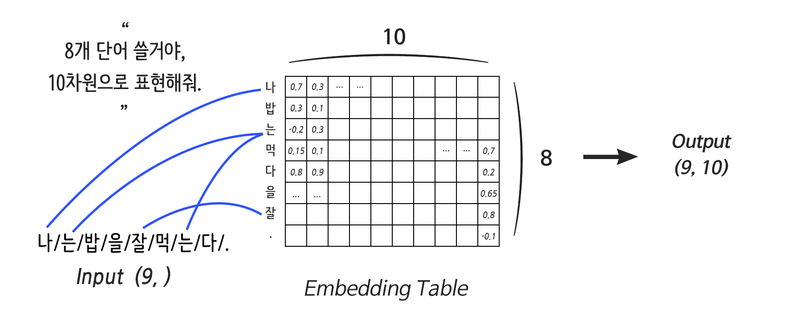

Embedding 레이어는 입력으로 들어온 단어를 분산 표현으로 연결해 주는 역할을 하는데 그것이 Weight에서 특정 행을 읽어오는 것과 같아 이 레이어를 룩업 테이블(Lookup Table) 이라고 부르기도 합니다. 미스터리로 남은 부분도 바로 여기죠, 단어가 룩업 테이블에 매핑되는 부분! 어떤 원리로 동작하는 걸까요?

이를 이해하기 위해서는 원-핫 인코딩(One-hot Encoding) 을 먼저 알아야 합니다. 유명한 개념이기 때문에 금방 양질의 정리 글들을 찾아낼 수 있죠. 그중에 필자는 아래 웹페이지를 추천합니다! 원-핫 인코딩(one-hot encoding) 부분을 잘 읽고, 단어 임베딩(word embedding) 부분은 참고하는 정도로 충분하겠어요!

어떻습니까? 본질적으로 원-핫 인코딩 그 자체는 이전 스텝에서 잠깐 다루었던 단어에 순번(인덱스)을 매겨서 표현하는 방식에 지나지 않습니다. 하지만 이 방식이 오늘 다룰 Embedding 레이어와 결합하여 매우 유용하게 사용될 수 있음을 보여드리겠습니다.

어떻습니까? 본질적으로 원-핫 인코딩 그 자체는 이전 스텝에서 잠깐 다루었던 단어에 순번(인덱스)을 매겨서 표현하는 방식에 지나지 않습니다. 하지만 이 방식이 오늘 다룰 Embedding 레이어와 결합하여 매우 유용하게 사용될 수 있음을 보여드리겠습니다.

In [5]:
import tensorflow as tf

vocab = {      # 사용할 단어 사전 정의
    "i": 0,
    "need": 1,
    "some": 2,
    "more": 3,
    "coffee": 4,
    "cake": 5,
    "cat": 6,
    "dog": 7
}

sentence = "i i i i need some more coffee coffee coffee"
# 위 sentence
_input = [vocab[w] for w in sentence.split()]  # [0, 0, 0, 0, 1, 2, 3, 4, 4, 4]

vocab_size = len(vocab)   # 8

one_hot = tf.one_hot(_input, vocab_size)
print(one_hot.numpy())    # 원-핫 인코딩 벡터를 출력해 봅시다.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


어때요, 원-핫 인코딩의 결과가 여러분이 상상한 것과 동일한가요? 이제 생성된 원-핫 벡터를 Linear 레이어에 넣어보죠. 놀라운 결과가 기다리고 있답니다..!



In [6]:
distribution_size = 2   # 보기 좋게 2차원으로 분산 표현하도록 하죠!
linear = tf.keras.layers.Dense(units=distribution_size, use_bias=False)
one_hot_linear = linear(one_hot)

print("Linear Weight")
print(linear.weights[0].numpy())

print("\nOne-Hot Linear Result")
print(one_hot_linear.numpy())

Linear Weight
[[ 0.29218888 -0.22090715]
 [-0.24981165 -0.04207802]
 [ 0.46065533 -0.13544929]
 [-0.6177681  -0.6586426 ]
 [-0.14788592 -0.49392158]
 [ 0.1748901  -0.7009666 ]
 [ 0.6007718  -0.30768743]
 [ 0.11669928 -0.06299227]]

One-Hot Linear Result
[[ 0.29218888 -0.22090715]
 [ 0.29218888 -0.22090715]
 [ 0.29218888 -0.22090715]
 [ 0.29218888 -0.22090715]
 [-0.24981165 -0.04207802]
 [ 0.46065533 -0.13544929]
 [-0.6177681  -0.6586426 ]
 [-0.14788592 -0.49392158]
 [-0.14788592 -0.49392158]
 [-0.14788592 -0.49392158]]


머리에 번쩍⚡ 하는 깨우침이 지나갔기를 바랍니다! 원-핫 벡터에 Linear 레이어를 적용하니 Linear 레이어의 Weight에서 단어 인덱스 배열 [ 0, 0, 0, 0, 1, 2, 3, 4, 4, 4 ] 에 해당하는 행만 읽어오는 효과가 있네요! 아까 미스터리했던 그림을 다시 살펴볼까요?

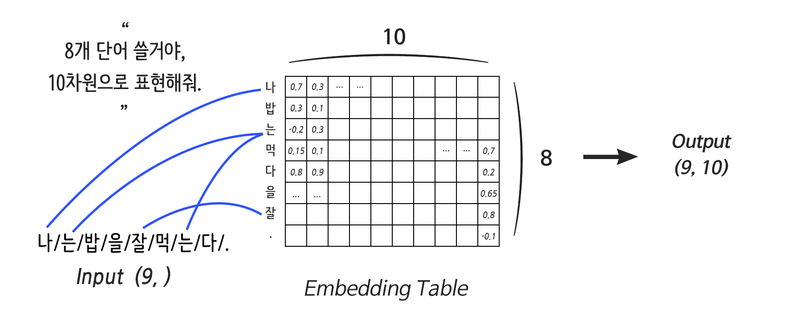

각 단어를 원-핫 인코딩해서 Linear 연산을 하는 것이 바로 파란 선의 정체였습니다! 원-핫 인코딩을 위한 단어 사전을 구축하고 단어를 사전의 인덱스로 변환만 해주면 Embedding 레이어를 완벽하게 사용할 수 있다는 겁니다. 많은 자연어 처리 모델에서 문장 데이터 속 단어들을 단어 사전의 인덱스 숫자로 표현했다가 모델에 입력하게 되는 것을 보게 되는데, 사실은 이렇게 인덱스를 원-핫 임베딩으로 변환한 후 Embedding 레이어의 입력으로 넣어주는 처리를 하고 있는 것입니다.

이제 Tensorflow에서 Embedding 레이어를 선언하는 법만 배우면 완벽하겠죠? 아래 코드로 확인해 봅시다!

In [7]:
some_words = tf.constant([[3, 57, 35]])
# 3번 단어 / 57번 단어 / 35번 단어로 이루어진 한 문장입니다.

print("Embedding을 진행할 문장:", some_words.shape)
embedding_layer = tf.keras.layers.Embedding(input_dim=64, output_dim=100)
# 총 64개의 단어를 포함한 Embedding 레이어를 선언할 것이고,
# 각 단어는 100차원으로 분산 표현 할 것입니다.

print("Embedding된 문장:", embedding_layer(some_words).shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

Embedding을 진행할 문장: (1, 3)
Embedding된 문장: (1, 3, 100)
Embedding Layer의 Weight 형태: (64, 100)


Embedding 레이어는 아주 쉽지만 주의사항이 하나 있습니다. 기본적으로 딥러닝은 미분을 기반으로 동작하는데, Embedding 레이어는 그저 단어를 대응 시켜 줄 뿐이니 미분이 불가능합니다. 따라서 신경망 설계를 할 때, 어떤 연산 결과를 Embedding 레이어에 연결시키는 것은 불가능합니다. 정확히 이해하고자 하면 어려우니, 지금은 주의사항을 숙지하는 것만으로 충분합니다. Embedding 레이어는 입력에 직접 연결되게 사용해야 한다는 것을 꼭 기억해 주세요! 그리고 그 입력은 원-핫 인코딩된 단어 벡터의 형태일 때가 이상적입니다.

그렇다면 Embedding 레이어를 통해 이렇게 멋지게 분산 표현으로 만든 문장은 어떻게 다루면 좋을까요? 지금까지 배운 레이어 중에는 적합한 게 썩 떠오르지 않죠? 바로 다음 단계에서 문장 데이터에 특화된 레이어를 배워 볼 겁니다!

Embedding 레이어는 아주 쉬운데, 간단하게 말하면 컴퓨터용 단어 사전입니다. 우리가 "단어를 n개 쓸거야 ~"라고 전달만 해주면 컴퓨터는 알아서 사전을 만들고, 수 많은 데이터를 거치며 각 단어의 의미(분산 표현)을 차근차근 업데이트

그리고 우린 "단어를 더 깊게 표현해~"라고도 말해줄 수 있다. Embedding 사이즈를 정해주면서 말이다. 그럼 weight는 자연스럽게 단어의 개수, Embedding사이즈로 정의됨을 알 수 있다. 이렇게 정의된 Embedding 레이어는 아래 그림과 같게 나타난다.

순차 데이터를 처리하기 위해 고안된 것이 바로 Recurrent Neural Network 또는 Recurrent레이어(이하 RNN)

[가,나,다,라,마]

이를 일반적인 Neural Network 모델에 학습시킨다면 데이터 각 요소의 전후 관계가 반영이 되지 않기 때문에 순차적 특장(정보)를 얻을 수 없다.

그렇다면 이전 요소에 대한 정보를 반영하기 위해서는 어떤 방법이 있을까요 ?
즉, 나 이전에 가가 있었다는 정보를, 다 이전에 가나, 라 이전엔 가나다가 있었다는 정보를 주면 된다.


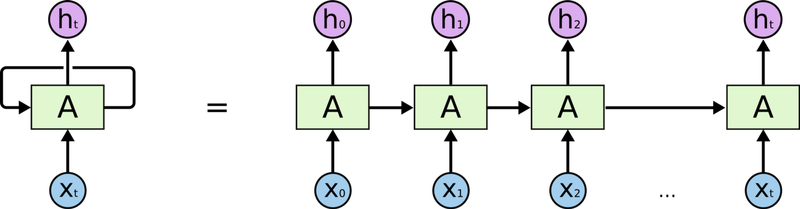

위의 영상을 통해서 RNN은 어떤 방법으로 데이터의 순차적 특징(정보)을 반영하고, 구조는 어떻게 이루어졌는 지 확인할 수 있다.

RNN의 입력으로 들어가는 모든 단어만큼 Weight를 만드는 게 아님에 유의합니다. (입력의 차원, 출력의 차원)에 해당하는 단 하나의 Weight를 순차적으로 업데이트하는 것이 RNN입니다. 그렇다 보니 한 문장을 읽고 처리하는 데에도 여러번의 연산이 필요해 다른 레이어에 비해 느리다는 단점이 있다.

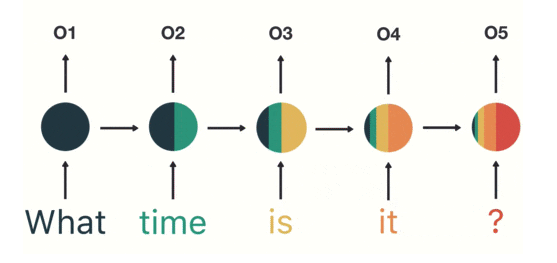

위 그림도 그것을 표현하여 첫 입력인 What의 정보가 마지막 입력인 ?에 다다라서는 거의 희석된 모습을 볼 수 있다. 이것이 RNN의 문제점이다.

입력의 앞부분이 뒤로 갈수록 옅어져 손실이 발생한다. 이를 기울기 소실문제라고 한다. 이를 해결하기 위한 코드가 어떻게 될까?

In [2]:
import tensorflow as tf

sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

print("RNN에 입력할 문장:", sentence)

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

print("Embedding을 위해 단어 매핑:", sentence_tensor.numpy())
print("입력 문장 데이터 형태:", sentence_tensor.shape)

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("\nEmbedding 결과:", emb_out.shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

rnn_seq_layer = \
tf.keras.layers.SimpleRNN(units=64, return_sequences=True, use_bias=False)
rnn_seq_out = rnn_seq_layer(emb_out)

print("\nRNN 결과 (모든 Step Output):", rnn_seq_out.shape)
print("RNN Layer의 Weight 형태:", rnn_seq_layer.weights[0].shape)

rnn_fin_layer = tf.keras.layers.SimpleRNN(units=64, use_bias=False)
rnn_fin_out = rnn_fin_layer(emb_out)

print("\nRNN 결과 (최종 Step Output):", rnn_fin_out.shape)
print("RNN Layer의 Weight 형태:", rnn_fin_layer.weights[0].shape)

RNN에 입력할 문장: What time is it ?
Embedding을 위해 단어 매핑: [[2 3 0 1 4]]
입력 문장 데이터 형태: (1, 5)

Embedding 결과: (1, 5, 100)
Embedding Layer의 Weight 형태: (5, 100)

RNN 결과 (모든 Step Output): (1, 5, 64)
RNN Layer의 Weight 형태: (100, 64)

RNN 결과 (최종 Step Output): (1, 64)
RNN Layer의 Weight 형태: (100, 64)


어떤 문장이 긍정인지 부정인지 나누기 위해서라면 문장을 모두 읽은 후, 최정 step의 output만 확인해도 판단이 가능하다. 하지만 문장을 생성하는 경우라면 이전 단어를 입력으로 받아 생성된 모든 다음 단어, 즉 모든 step에 대한 output이 필요하다. 그것은 위 코드에서 tf.keras.layers.SimpleRNN 레이어의 return_sequences 인자를 조절함으로써 조절할 수 있다.

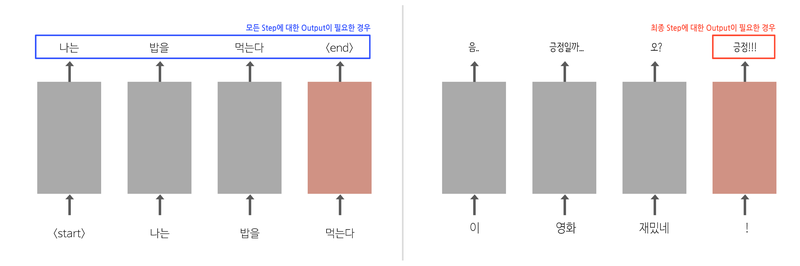

위 코드에서 RNN 레이어에 대한 부분은 이렇게 바꿀 수도 있다. 동작하는 방식은 위 코드와 동일하다.

In [3]:
lstm_seq_layer = tf.keras.layers.LSTM(units=64, return_sequences=True, use_bias=False)
lstm_seq_out = lstm_seq_layer(emb_out)

print("\nLSTM 결과 (모든 Step Output):", lstm_seq_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_seq_layer.weights[0].shape)

lstm_fin_layer = tf.keras.layers.LSTM(units=64, use_bias=False)
lstm_fin_out = lstm_fin_layer(emb_out)

print("\nLSTM 결과 (최종 Step Output):", lstm_fin_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_fin_layer.weights[0].shape)


LSTM 결과 (모든 Step Output): (1, 5, 64)
LSTM Layer의 Weight 형태: (100, 256)

LSTM 결과 (최종 Step Output): (1, 64)
LSTM Layer의 Weight 형태: (100, 256)


처음 보는 LSTM이라는 레이어가 등장했다. Embedding 벡터의 차원수(unit)의 크기가 동일한 경우(위 예에서는 unit=64), Weight의 크기가 위에서 사용했던 SimpleRNN의 4배가 되는 것을 볼 수 있는 데, 왜 이런 RNN레이어가 등장하게 된 것일까요?

# 순차적인 데이터! Recurrent레이어 (2) LSTM

RNN은 음성 인식, 언어 모델링, 번역, 이미지 주석 생성 등의 다양한 분야에서 의미있는 성능을 보여줬으나 간단한 RNN의 구조만으로는 한계가 있다. 바로 장기 의존성(Long - Term Dependency)을 잘 다루지 못하는 문제이다. 입력 데이터가 길어질 수록 데이터 앞쪽의 정보가 뒤쪽까지 전달이 잘 안되는 현상이다. 이는 RNN의 hidden layer를 학습하는 과정에서 기울기 소실문제가 발생하기 때문이다.

LSTM은 Long Short - Term Memory의 약어로 기울기 소실 문제를 해결하기 위해 고안된 RNN 레이어이다.

딥러닝 네트워크는 에러에 대한 각 가중치의 미분을 구해 업데이트하는 백프로퍼게이션을 통해 학습하죠. RNN의 네트워크 구조 특성상, 입력되는 문장이 길수록 초기에 입력된 단어들의 미분 값이 매우 작아지거나 커지는 현상이 발생한다. 만약 미분 값이 너무 작아진다면 이를 Vanishing Gradient라고 부르고, 너무 커진다면 Exploding Gradient라고 한다. 전자의 경우, 가중치 업데이트가 잘 안 되니 학습이 거의 이루어지지 않는다. 후자의 경우, 가중치 업데이트가 너무 크니 학습이 불안정 하다.

수직적으로 자세히 알고 싶은 분들은 아래 링크를 참고해주세요

LSTM은 어떻게 장기 의존성 문제를 해결했을까요?

그 힌트는 LSTM(Long Short-Term Memory)의 이름에서 얻을 수 있다. 바로 장기기억(long-term memory)과 단기기억(short-term memory)을 처리하는 부분을 구분하여 문제를 해결했다.

좀 더 자세히 살펴보죠.

아래는 RNN의 그래프와 LSTM의 그래프이다.

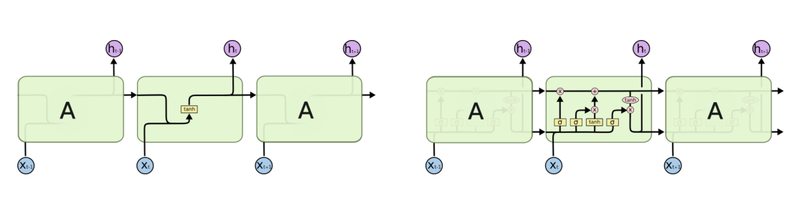

RNN에 비해 LSTM의 구조는 훨씬 복잡해 보인다. 좀 더 들여다 봅시다.

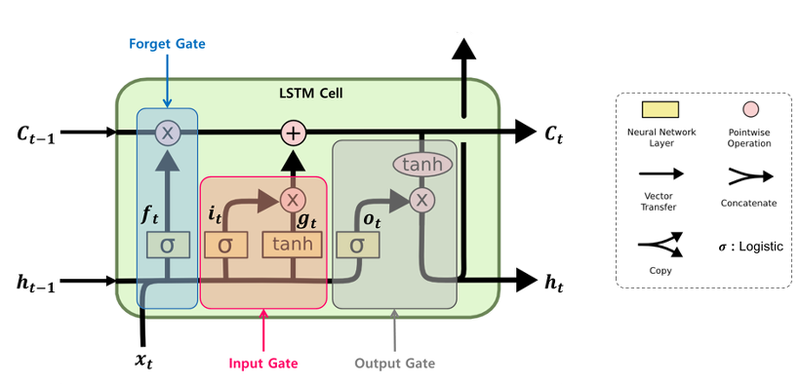

RNN에서는 볼 수 없었던 Ct가 새롭게 등장했다. 이는 Cell state의 약자로 LSTM의 핵심 아이디어라고 할 수 있다. 전체 체인을 관통을 흐르며 long-term memory의 역할을 수행한다.


LSTM은 3개의 Gate Layer를 갖고 있다.

Forget Gate Layer : cell state의 기존 정보를 얼마나 잊어버릴지를 결정하는 gate
Input Gate Layer : 새롭게 들어온 정보를 기존 cell state에 얼마나 반영할지를 결정하는 gate
Output Gate Layer : 새롭게 만들어진 cell state를 새로운 hidden state에 얼마나 반영할 지를 결정하는 gate

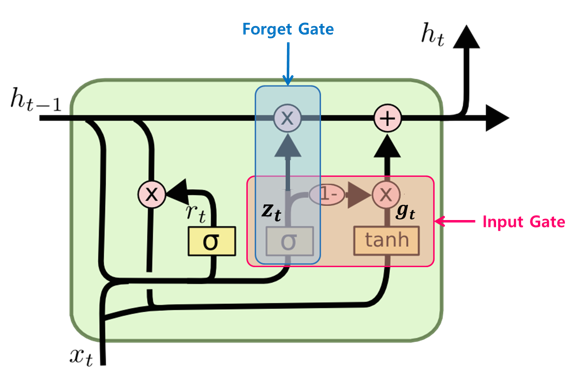

지금까지 기본적은 LSTM 모델에 대해 설명 드렸다. 여기에 변형을 주는 시도들도 많이 있다. 그 중 유명한 GRU(Gated Recurrent Unit)를 소개드릴게요. GRU는 기존 LSTM을 보다 단순하게 만든 구조로, cell state와 hidden state를 합치고, forget gate와 input gate를 통합했다.

GRU가 LSTM 보다 좋은 이유

LSTM에 비해 GRU가 학습할 가중치(Weight)가 더 적다. (LSTM의 1/4)

둘 다 각각의 장단점을 가지고 있기에 뭐가 더 좋다고 단정 지을 수 없다. 윗글에 말하듯이 LSTM은 GRU에 비해 Weight가 많기 때문에 충분한 데이터가 있는 상황에 적합하고, 반대로 GRU는 적은 데이터에도 웬만한 학습 성능을 보여준다. 이것저것 사용해보며 여러분의 프로젝트에 적합한 레이어를 찾아보세요 !

## 양방향(Bidirectional) RNN

마지막으로 살펴볼 것은 진행 방향에 변화를 준 RNN입니다. 날이 너무 [] 에어컨을 켰다라는 예문이 있다면, 빈칸에 들어갈 말이 '더워서'인 것은 어렵지 않게 유추할 수 있다. 그 근거는 아마도 '어어컨을 켰다'는 말 때문이겠죠? 하지만 우리가 지금까지 배운 RNN은 모두 순반향이었기 때문에 에어컨이라는 정보가 없는 채로 빈칸에 들어갈 단어를 생성해야 합니다. 자칫하면 날이 너무 추워서 에어컨을 켰다는 이상한 문장이 생성될 지도 몰라요 !

이를 해결하기 위해 제안된 것이 양방향(Bidirectional) RNN입니다. 말이 조금 어렵지만, 그저 진행 방향이 반대인 RNN을 2개 겹쳐놓은 형태랍니다.

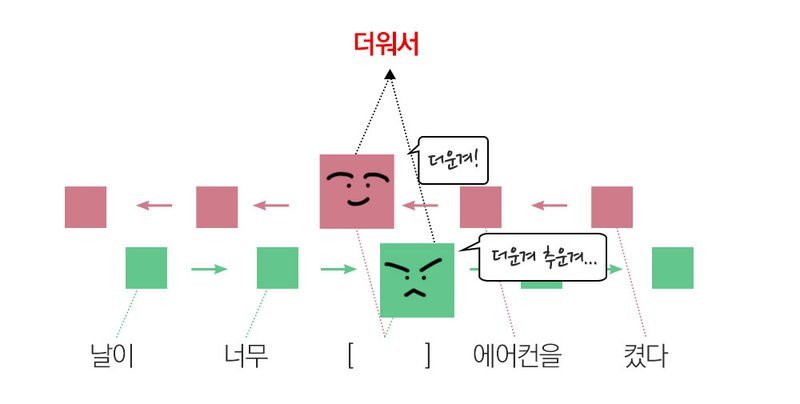

원리만큼이나 간단하게 Tensorflow에서도 LSTM 등 모든 RNN 계열 레이어에 쉽게 적용시킬 수 있습니다. 사용하고자 하는 레이어를 tf.keras.layers.Bidirectional()로 감싸주기만 하면 된다.

양방향(Bidirectional) RNN이 필요한 상황은 어떤 것일까요? 문장 분석이나 생성보다는 주로 기계번역 같은 테스크에 유리하다. 사람도 대화를 하면서 듣고 이해하는 것은 순차적으로 들으면서 충분히 예측을 동원해서 잘 해냅니다. 그러나 문장을 번역하려면 일단은 번역해야 할 문장 전체를 끝까지 분석한 후 번역을 시도하는 것이 훨씬 유리하다. 그래서 자연어 처리를 계속하면서 알게 되지만, 번역기를 만들 때 양방향(Bidirectional) RNN 계열의 네트워크, 혹은 동일한 효과를 내는 Transformer 네트워크를 주로 사용하게 될 것이다. 

In [4]:
import tensorflow as tf

sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("입력 문장 데이터 형태:", emb_out.shape)

bi_rnn = \
tf.keras.layers.Bidirectional(
    tf.keras.layers.SimpleRNN(units=64, use_bias=False, return_sequences=True)
)
bi_out = bi_rnn(emb_out)

print("Bidirectional RNN 결과 (최종 Step Output):", bi_out.shape)

입력 문장 데이터 형태: (1, 5, 100)
Bidirectional RNN 결과 (최종 Step Output): (1, 5, 128)


Bidirectional RNN은 순방향 Weight와 역방향 Weight를 각각 정의하므로 우리가 앞에서 배운 RNN의 2배 크기 Weight가 정의된다. units를 64로 정의해 줬고, 입력은 Embedding을 포함하여 (1,5,100), 그리고 양방향에 대한 Weight를 거쳐 나올 테니 출력은 (1, 5, 128)이 맞죠 ?